In [2]:
# 60. 単語ベクトルの読み込みと表示
import gdown

url = 'https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=7d2b8b80-317b-4e1d-9d19-3b1ed74677ba
To: /Users/xuanxin/Documents/nlp100exercise/Chapter7/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:33<00:00, 48.8MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [1]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
model['United_States']

In [9]:
# 61. 単語の類似度
model.similarity('United_States', 'U.S.')

0.73107743

In [11]:
# 62. 類似度の高い単語10件
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [12]:
# 63. 加法構成性によるアナロジー
vec = model['Spain'] - model['madrid'] + model['Athens'] 
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.5168809294700623),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

In [17]:
# 64. アナロジーデータでの実験
!wget http://download.tensorflow.org/data/questions-words.txt
# 先頭5行の確認
!head -5 questions-words.txt

--2023-06-21 10:40:31--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.206.240
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.206.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.2’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.04s   

2023-06-21 10:40:31 (13.6 MB/s) - ‘questions-words.txt.2’ saved [603955/603955]

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany


In [20]:
# f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [21]:
!head -5 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777378082275
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414


# 意味的アナロジー : No.1 ~ No.5
# 文法的アナロジー : No.6 ~ No.14
No.	カテゴリ
1	capital-common-countries
2	capital-world
3	currency
4	city-in-state
5	family
6	gram1-adjective-to-adverb
7	gram2-opposite
8	gram3-comparative
9	gram4-superlative
10	gram5-present-participle
11	gram6-nationality-adjective
12	gram7-past-tense
13	gram8-plural
14	gram9-plural-verbs

In [22]:
# 65. アナロジータスクでの正解率
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


In [25]:
# 66. WordSimilarity-353での評価
!head -5 'wordsim353/combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46


In [27]:
ws353 = []
with open('wordsim353/combined.csv', 'r') as f:
  next(f)   # skip the first line of the file
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [28]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


In [29]:
#  67. k-meansクラスタリング
# 国名の取得
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
      countries.add(line[4])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
      countries.add(line[3])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [31]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

/Users/xuanxin/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0
Cuba, Uruguay, Honduras, Jamaica, Chile, Samoa, Nicaragua, Peru, Brazil, Argentina, Ecuador, Guyana, Tuvalu, Mexico, Venezuela, Suriname, Dominica, Belize, Bahamas, Colombia
cluster 1
Denmark, Greenland, Iceland, Malta, Hungary, Italy, Europe, Portugal, USA, Spain, Belgium, Finland, Norway, Liechtenstein, Netherlands, Romania, Sweden, Switzerland, Montenegro, Latvia, Slovenia, France, Austria, Ireland, England, Croatia, Canada, Estonia, Germany, Lithuania, Slovakia, Poland, Greece
cluster 2
Gabon, Nigeria, Kenya, Madagascar, Botswana, Gambia, Ghana, Angola, Mauritania, Niger, Senegal, Rwanda, Burundi, Guinea, Zimbabwe, Mozambique, Morocco, Sudan, Zambia, Liberia, Mali, Malawi, Somalia, Namibia, Eritrea, Tunisia, Algeria, Uganda
cluster 3
Iran, Ukraine, Russia, Armenia, Iraq, Belarus, Georgia, Libya, Turkmenistan, Tajikistan, Egypt, Syria, Kyrgyzstan, Serbia, Moldova, Uzbekistan, Macedonia, Afghanistan, Cyprus, Israel, Turkey, Albania, Kazakhstan, Azerbaijan, Bulgaria, Jordan,

In [ ]:
# Ward法について
https://dx-consultant-fast-evolving.com/the-basis-of-ward-method/

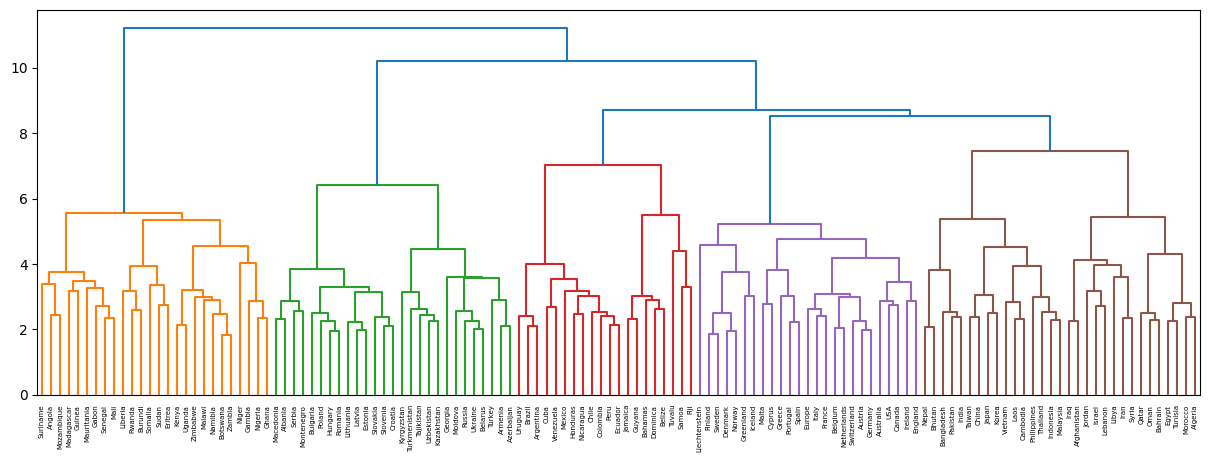

In [38]:
# 68. Ward法によるクラスタリング
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward') # Z is a linkage matrix
dendrogram(Z, labels=countries)
plt.show()

Using random seed: 123
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 0 of 129
Input similarities computed in 0.03 seconds (sparsity = 0.831440)!
Learning embedding...
Iteration 50: error is 53.018273 (50 iterations in 0.03 seconds)
Iteration 100: error is 52.614033 (50 iterations in 0.03 seconds)
Iteration 150: error is 56.049110 (50 iterations in 0.03 seconds)
Iteration 200: error is 51.252785 (50 iterations in 0.03 seconds)
Iteration 250: error is 2.152651 (50 iterations in 0.03 seconds)
Iteration 300: error is 1.567977 (50 iterations in 0.02 seconds)
Iteration 350: error is 0.793245 (50 iterations in 0.02 seconds)
Iteration 400: error is 0.390867 (50 iterations in 0.03 seconds)
Iteration 450: error is 0.319838 (50 iterations in 0.03 seconds)
Iteration 500: error is 0.305242 (50 iterations in 0.03 seconds)
Iteration 550: error is 0.307165 (50 iterations in 0.03 seconds)
Iteration 600: error is 0.307579 (50 it

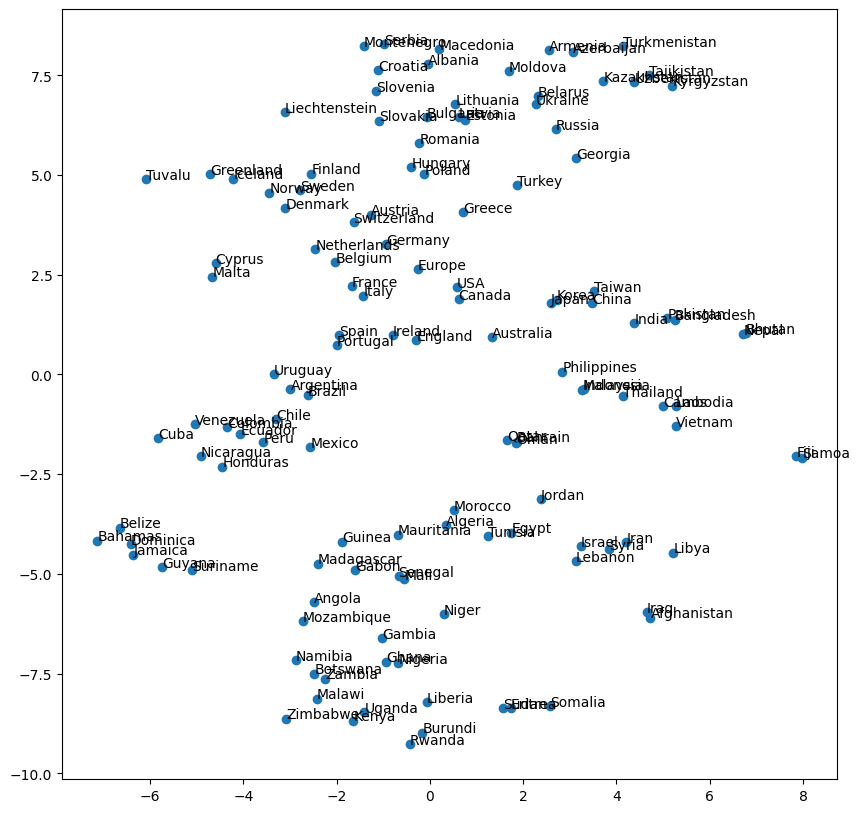

In [40]:
# 69. t-SNEによる可視化  # 次元削減のアルゴリズムt-SNE(t-Distributed Stochastic Neighbor Embedding)
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()